## This is my first Kaggle competition entry 28/05/18 ###
#Ames Housing Data 

Currently about halfway thorugh my data analysis and machine leanring with python 
course on Udemy and I have not started the machine learning modules
The purpose of this exersise is to test my knowledge and understanding so far and to
dive striaght into more advance topics with the use of a guied tutorial found on data quest

We'll work through the House Prices: Advanced Regression Techniques competition.
data can be found at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Acquire the data
Explore the data
Engineer and transform the features and the target variable
Build a model
Make and submit predictions

# Step 1 Acquire data and create environment 




In [199]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('C:/Users/munir.welch/Downloads/train.csv')
test = pd.read_csv('C:/Users/munir.welch/Downloads/test.csv')

In [200]:
# size of each data set 

print('Test data is rows and columns', test.shape)
print('Train data is row and columsn', train.shape)

Test data is rows and columns (1459, 80)
Train data is row and columsn (1460, 81)


In [201]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2 EDA and Feature Engineering 



The challenge is to predict the final sale price of the homes. This information is stored in the SalePrice column.
The value we are trying to predict is often called the target variable.

In [202]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From this was can see the average sale price was around $180000
 and most of the houses fell in the $130000 to $214000 riegion 
Next, we'll check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed.
One reason for this is to improve the linearity of the data.
Importantly, the predictions generated by the final model will also be log-transformed, 
so we'll need to convert these predictions back to their original form later.
np.log() will transform the variable, and np.exp() will reverse the transformation.

the sale price is skewed by 1.8828757597682129


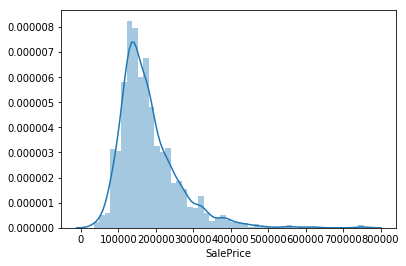

In [203]:
sns.distplot(train.SalePrice)
print('the sale price is skewed by', train.SalePrice.skew())

The skew is now 0.12133506220520406


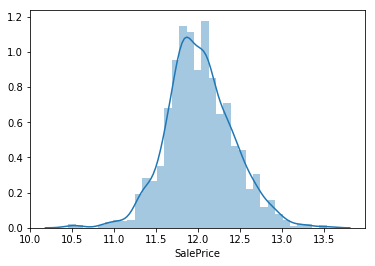

In [204]:
# now we log trainform the saleprice and recalculate the skew and plot 

target = np.log(train.SalePrice)
sns.distplot(target)
print('The skew is now', target.skew())

 Now that we've transformed the target variable, let's consider our features. First, we'll check out the numerical features and make some plots. 
The .select_dtypes() method will return a subset of columns matching the specified data types.

In [205]:
numeric_features = train.select_dtypes(include=np.number)
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [206]:
# next we want to see how the numerical features correlate to out targt feature Sale Price

corr = numeric_features.corr()

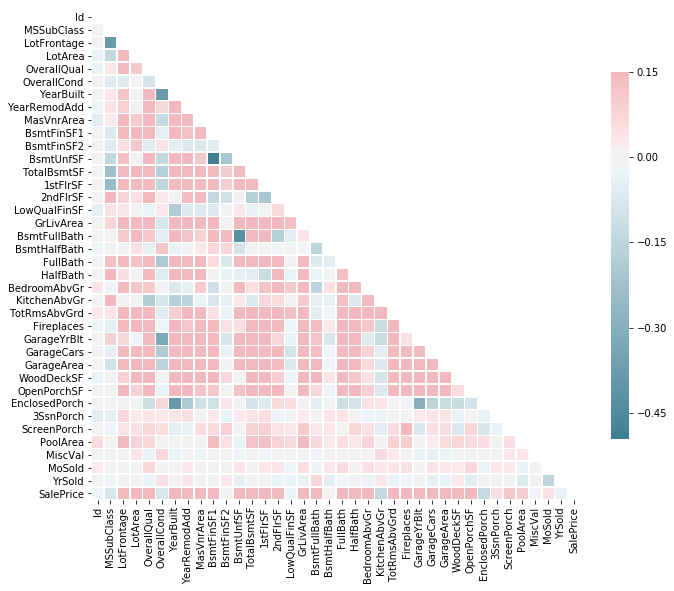

In [207]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure (size)
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask = mask, cmap = cmap, vmax=0.15, center=0, square = True, linewidths=.5,cbar_kws={"shrink": .75} )

In [208]:
# these are the top 5 most correlating features to Sale Price
corr5 = numeric_features.corr().SalePrice.sort_values(ascending = False).head() 
print('the 5 most correlating features are', corr5)

the 5 most correlating features are SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


 now that we know which feautres are linked the strongest with our target feature
lets explore them more startign with OverallQual 

In [209]:
# this tell us the unique data in this column and we can see integer values from 1 - 10
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [210]:
#We can create a pivot table to further investigate the relationship between OverallQual and SalePrice.
# setting the index to OverallQual and looking at the median values 

quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot


,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Text(0,0.5,'Median Sale Price')

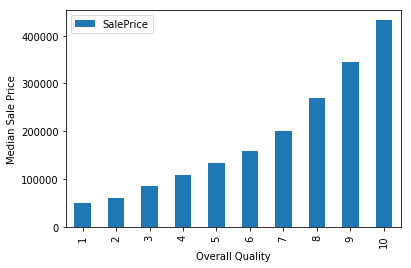

In [211]:
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')

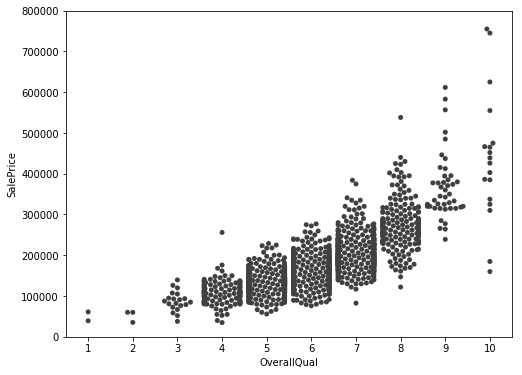

In [212]:

fig = plt.subplots(figsize=(8, 6))
fig = sns.swarmplot(x="OverallQual", y="SalePrice", data=train, color=".25")
fig.axis(ymin=0, ymax=800000);

 these two plots tell us the following about the OverallQaulity vs SalePirce relationship
 firstly as overall quality increaes the median sale price also increases almost proportionaltely 
 secondly that with quality values of 9 and 10 there is much less correlation between the features and 
 large variance 

Next we can look at GrLivArea and GarageArea

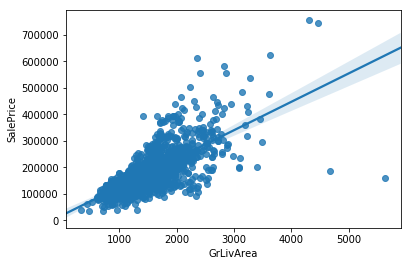

In [213]:
sns.regplot(x='GrLivArea',y='SalePrice', data=train)

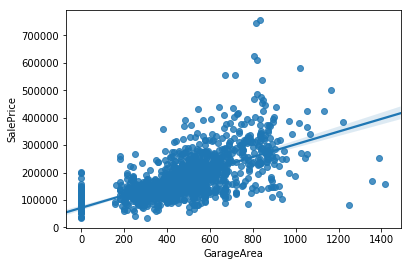

In [214]:
sns.regplot(x='GarageArea',y='SalePrice', data=train)

In [215]:
#There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line.
#So, we'll remove those observations from our data.

train= train[train['GarageArea'] < 1200]

Handling Null Values

In [216]:
#using the isnull mehtod with the sum mehtod 
totalNulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
totalNulls.index.name = 'feature'
totalNulls.columns = ['Null Count']
totalNulls.head(20)

,Null Count
feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


using the documentation we can see that the null values for the first two PoolQC and
MiscFeature are actually null when describing the absance of a fautre not that the data is 
actually missing 

Lets take a look at the non numeric features now 


In [217]:
categoricals = train.select_dtypes(exclude=np.number)
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


The count column indicates the count of non-null observations, while unique counts the number of unique values. 
top is the most commonly occurring value, with the frequency of the top value shown by freq.

For many of these features, we might want to use one-hot encoding to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so
the model can understand whether or not a particular observation falls into one category or another.

# Transforming and engineering features

When transforming features, it's important to remember that any transformations that you've applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

In [218]:
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

In [219]:
train['enc_street']=pd.get_dummies(train.Street,drop_first=True)
test['enc_street']=pd.get_dummies(test.Street,drop_first=True)

# drop-first refers to the number of dummie variables to create i.e if there are 4 catergories
#3 dummies will be created so there new columns 

In [220]:
train.enc_street.value_counts()

1    1450
0       5
Name: enc_street, dtype: int64

We've engineered the first feature. Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

Let's try engineering another feature. We'll look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual.

Text(0,0.5,'Median Sale Price')

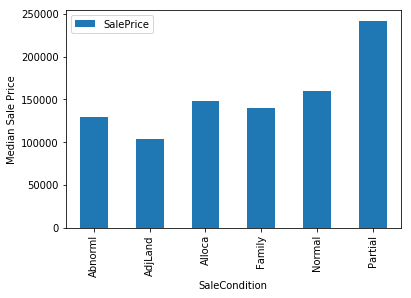

In [221]:
condition_pivot = train.pivot_table(values='SalePrice', index='SaleCondition', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.ylabel('Median Sale Price')

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

In [222]:
def encode(x):
    if x == 'Partial':
        return 1
    else:
        return 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

Text(0,0.5,'Median sale price')

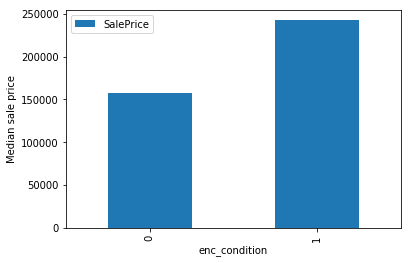

In [223]:
condition_pivot = train.pivot_table(index = 'enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.ylabel('Median sale price')

Lets continue to work on more of the cat features like this

C:\Users\munir.welch\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


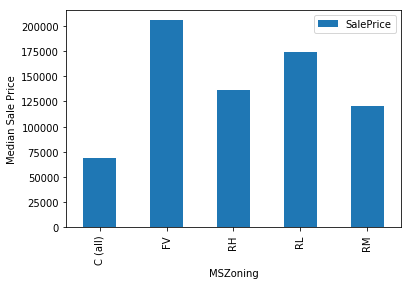

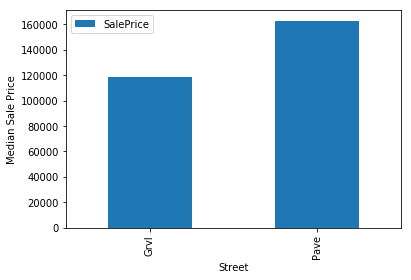

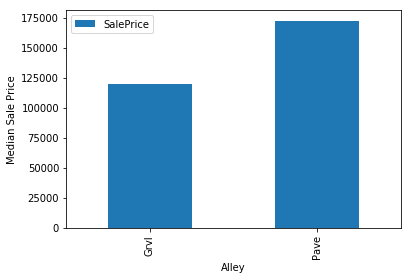

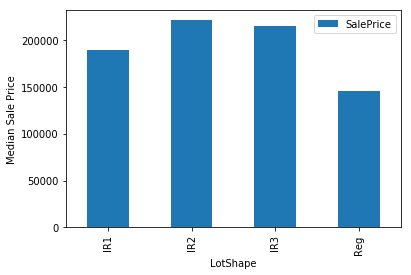

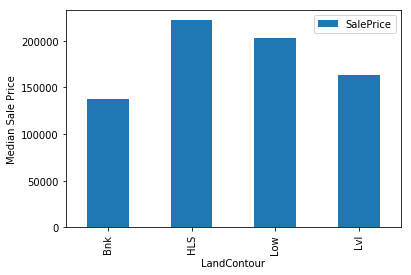

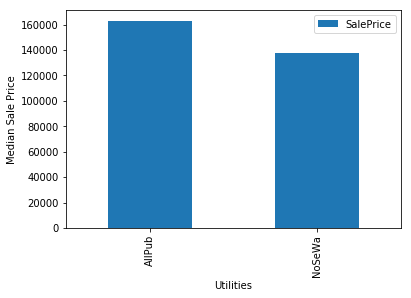

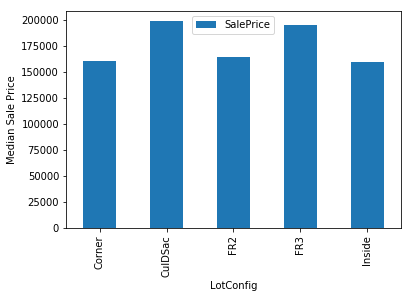

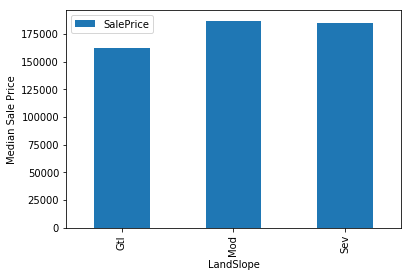

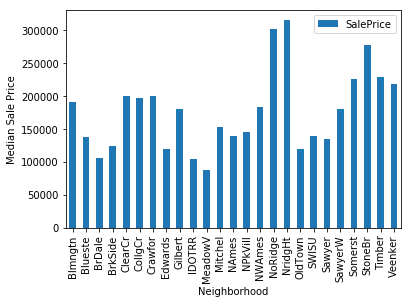

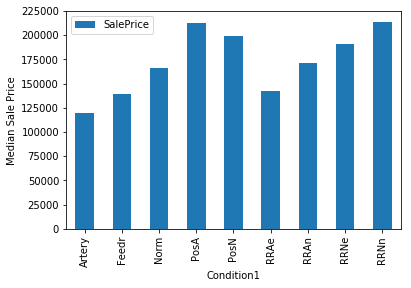

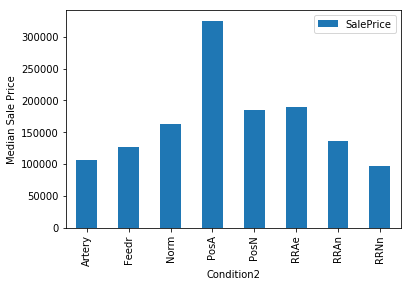

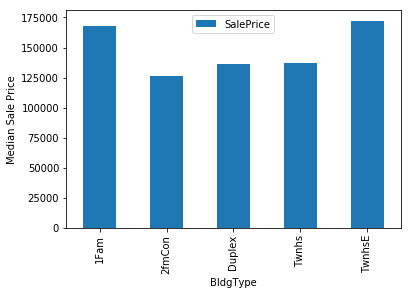

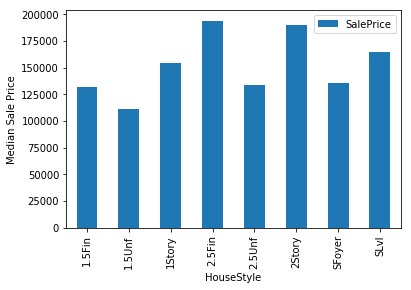

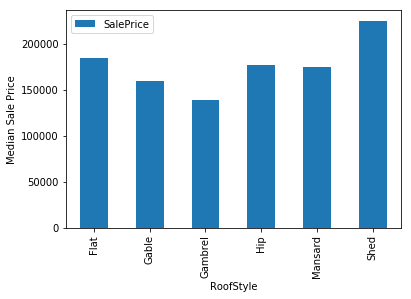

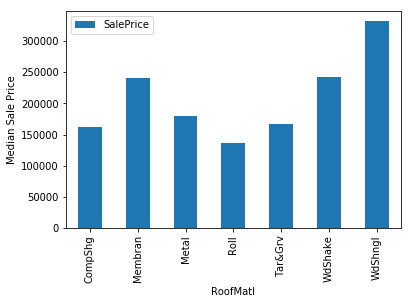

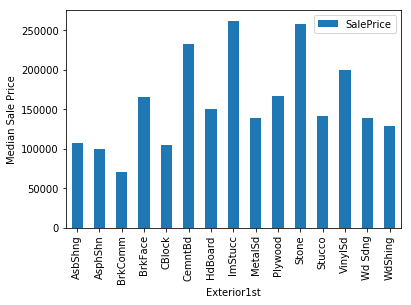

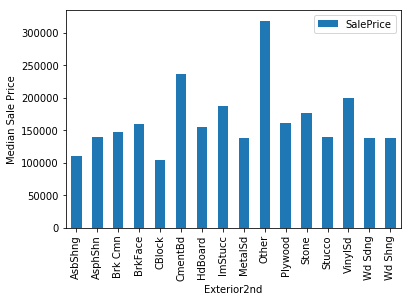

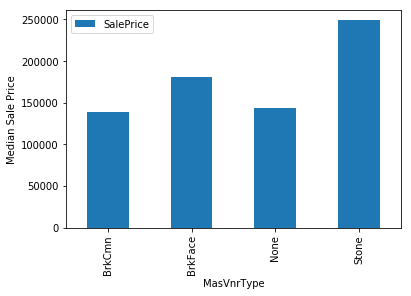

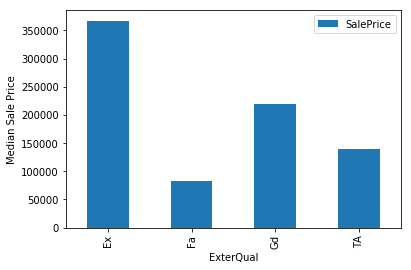

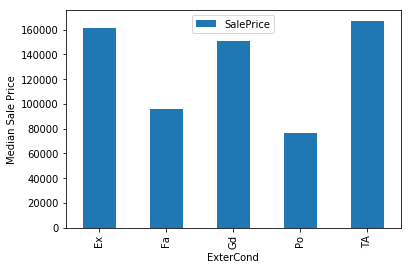

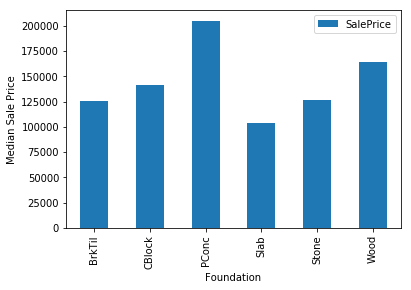

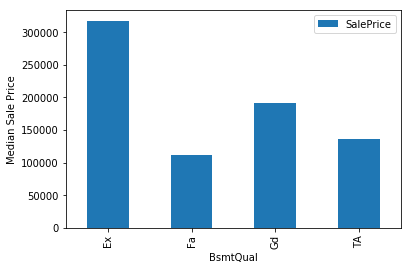

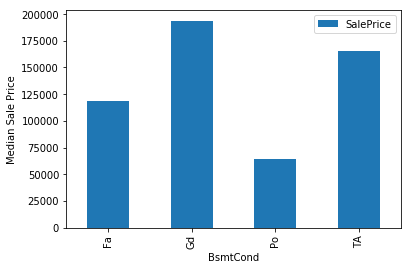

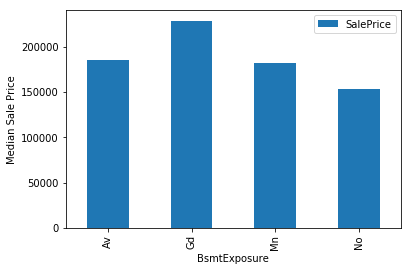

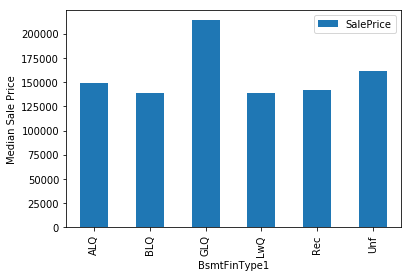

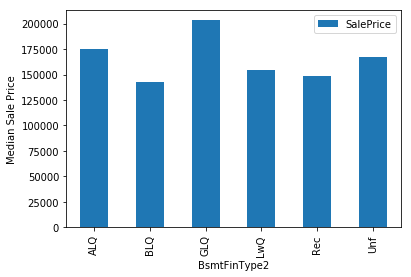

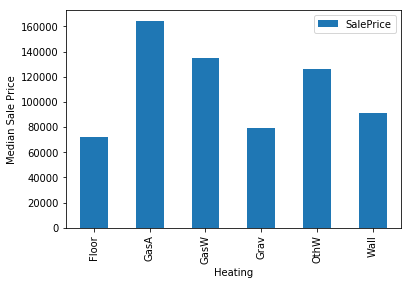

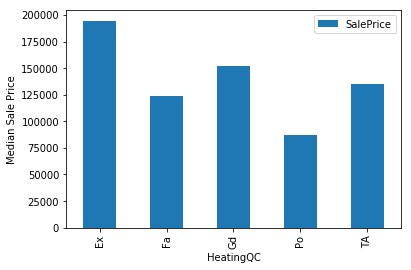

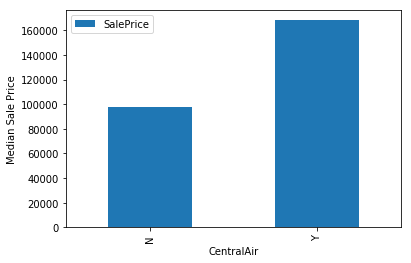

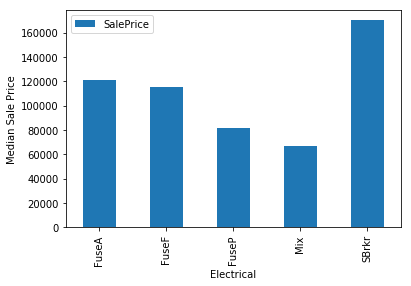

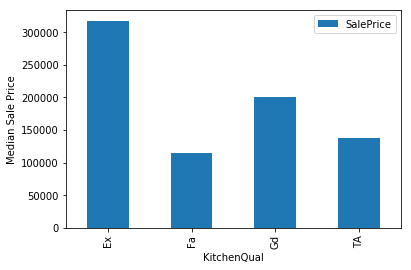

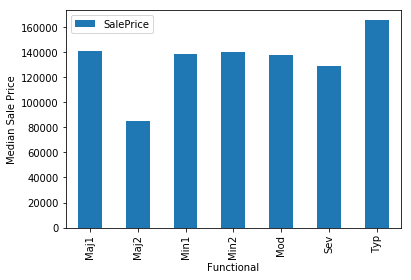

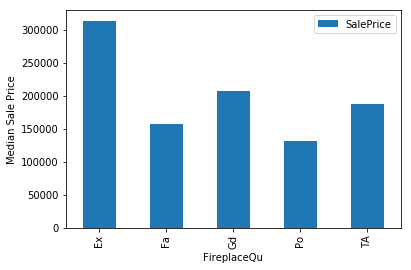

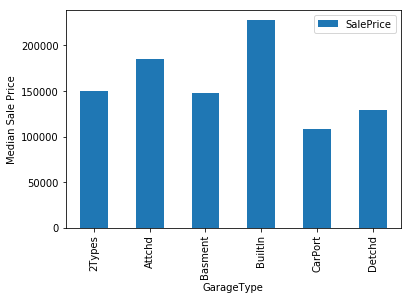

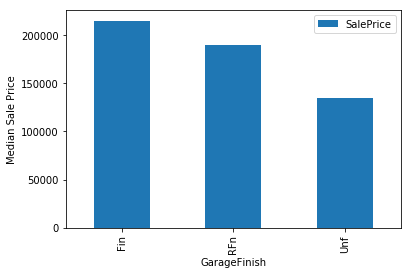

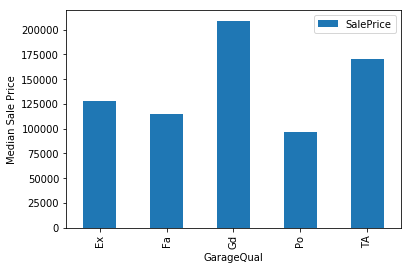

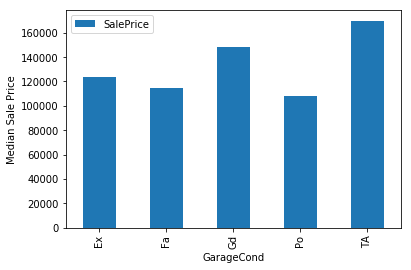

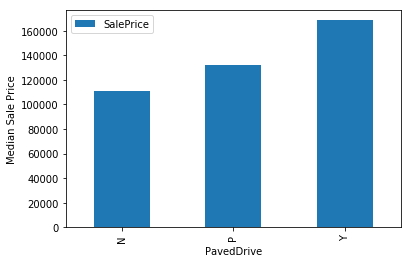

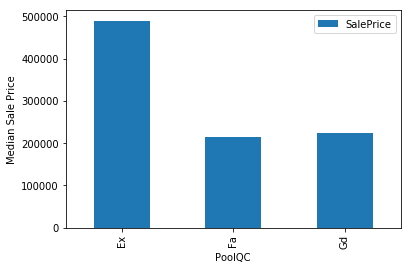

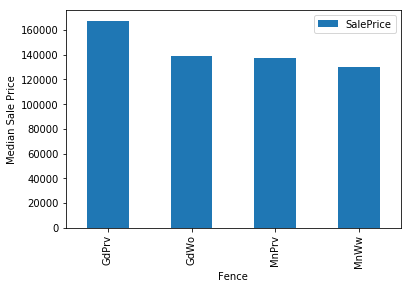

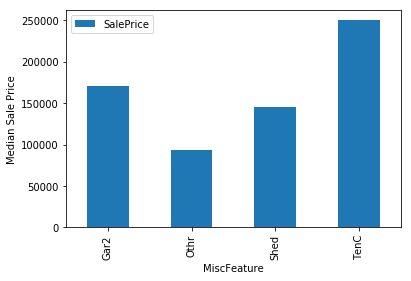

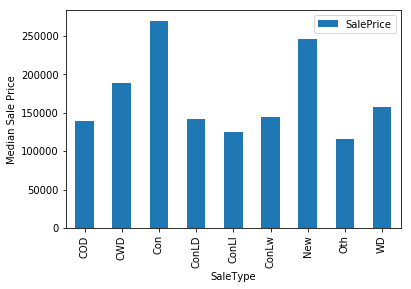

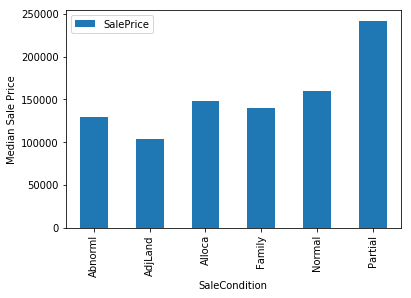

In [224]:
list_of_cat = list(categoricals.columns)
for x in list_of_cat:
    condition_pivot = train.pivot_table(values='SalePrice', index=x, aggfunc=np.median)
    condition_pivot.plot(kind='bar')
    plt.ylabel('Median Sale Price')



In [225]:
def encode(x):
    if x == 'FV':
        return 1
    else:
        return 0
train['enc_MSZoning'] = train.MSZoning.apply(encode)
test['enc_MSZoning'] = test.MSZoning.apply(encode)

In [226]:
def encode(x):
    if x == 'PosA':
        return 1
    else:
        return 0
train['enc_condition2'] = train.Condition2.apply(encode)
test['enc_condition2'] = test.Condition2.apply(encode)

In [227]:
def encode(x):
    if x == 'Ex':
        return 1
    else:
        return 0
train['enc_EQ'] = train.ExterQual.apply(encode)
test['enc_EQ'] = test.ExterQual.apply(encode)

In [228]:
def encode(x):
    if x == 'Stone':
        return 1
    else:
        return 0
train['enc_MVT'] = train.MasVnrType.apply(encode)
test['enc_MVT'] = test.MasVnrType.apply(encode)

In [229]:
def encode(x):
    if x == 'Ex':
        return 1
    else:
        return 0
train['enc_EXQ'] = train.BsmtQual.apply(encode)
test['enc_EXQ'] = test.BsmtQual.apply(encode)

In [230]:
def encode(x):
    if x == 'Y':
        return 1
    else:
        return 0
train['enc_CA'] = train.CentralAir.apply(encode)
test['enc_CA'] = test.CentralAir.apply(encode)

In [231]:
def encode(x):
    if x == 'Ex':
        return 1
    else:
        return 0
train['enc_KQ'] = train.KitchenQual.apply(encode)
test['enc_KQ'] = test.KitchenQual.apply(encode)

In [232]:
def encode(x):
    if x == 'Ex':
        return 1
    else:
        return 0
train['enc_PQC'] = train.PoolQC.apply(encode)
test['enc_PQC'] = test.PoolQC.apply(encode)

Next we need to apply the log version of sale price to the training set 

In [235]:
train.SalePrice = target

Before we prepare the data for modeling, we need to deal with the missing data. We'll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference.

Note that what we are bout to do will drop all columns that are categorigal that have not been encoded. This could negitevely effect the performance

In [238]:
# rememenr select_dtypes selects columsn with numeric 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [245]:
#quick check to see if any columns have null values
sum(data.isnull().sum() != 0)

0

# Step 3 : Build a linear model

Let's perform the final steps to prepare our data for modeling. We'll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y.
We won't include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [246]:
y = train.SalePrice
x = data.drop(['SalePrice','Id'], axis=1)


Let's partition the data and start modeling.
We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

X_train is the subset of our features used for training.

X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.

y_train is the target variable SalePrice which corresponds to X_train.

y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn's train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = .33 )

create a Linear Regression model. First, we instantiate the model.

In [252]:
from sklearn import linear_model
LRM = linear_model.LinearRegression()

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we'll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [253]:
model = LRM.fit(x_train,y_train)

# Evaluate the performance and visualize results

Now, we want to evaluate the performance of the model.
The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [254]:
model.score(x_test,y_test)

0.8888119566739991

This means that our features explain approximately 89% of the variance in our target variable. 

Next, we'll consider rmse. To do so, use the model we have built to make predictions on the test data set.

In [255]:
predictions = model.predict(x_test)

The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The mean_squared_error function takes two arrays and calculates the rmse.

In [257]:
from sklearn.metrics import mean_squared_error

In [258]:
mean_squared_error(y_test,predictions)

0.017751719482447092

We can view this relationship graphically with a scatter plot.

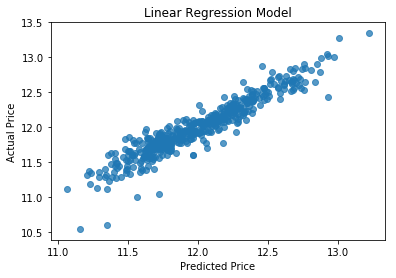

In [260]:
plt.scatter(predictions, y_test, alpha=.75)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# Step 4: Make a submission

We'll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

In [263]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Now, select the features from the test data for the model as we did above for th train data 

In [264]:
subtest = test.select_dtypes(include=np.number).drop(['Id'], axis = 1).interpolate()

In [266]:
sub_predictions = model.predict(subtest)

In [267]:
sub_predictions

array([11.75922348, 11.72765084, 12.07263192, ..., 12.13366605,
       11.61323844, 12.37344748])

Now we'll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [268]:
final_predictions = np.exp(sub_predictions)

In [269]:
final_predictions

array([127928.07635185, 123952.14491741, 175015.86821535, ...,
       186030.52370694, 110551.68588337, 236439.46269586])

In [270]:
submission['SalePrice'] = final_predictions

In [274]:
submission.head()

,Id,SalePrice
0,1461,127928.076352
1,1462,123952.144917
2,1463,175015.868215
3,1464,197299.109538
4,1465,176757.112260


In [276]:
submission.to_csv('Munir_ames_LRM.csv', index = False)

# Achieved a Score of 0.13649 position 589 out of 5388!!!